**Esercitazione**
Provare a completare il notebook, seguendo le indicazioni fornite.
Il notebook è fornito già eseguito, in modo da poter sfruttare l'output generato da ogni cella per
verificare la correttezza della risoluzione.
Alcune parti di codice sono state sostituite da tre punti consecutivi.


### Dataset sulla qualità dei vini

*Questo set di dati è correlato alle varianti rosse del vino portoghese
"Vinho Verde". Il set di dati descrive la quantità di varie sostanze
chimiche presenti nel vino e permette di identificare il loro effetto
sulla sua qualità.
Il dataset è disponibile su Kaggle alla url
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset*

In [1]:
# importazione librerie necessarie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
# caricamento dataset in memoria

# utilizzare il metodo [read_csv] dei dataframe di Pandas
# per caricare il file disponibile all'indirizzo
# 'data/WineQT.csv'

df =pd.read_csv('data/WineQT.csv')
df.shape

(1143, 13)

In [3]:
# visualizzazione delle prime 10 righe del dataset
# utilizzando uno stile per il background delle celle
# in grado di evidenziare i valori minimi e massimi
# tramite gradienti di colore che vanno dal bianco
# all'arancione, sfruttando il metodo:
# https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html

color_map = sns.light_palette('orange', as_cmap=True)
#df.head(10).style.background_gradient(cmap='YlOrRd', axis=1)
df.head(10).style.background_gradient(color_map, axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,4
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5,6
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7,8
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5,10


In [4]:
# eliminazione della colonna [id] dal dataframe [df]

df=df.drop('Id', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [5]:
# stampare il numero di righe e di colonne disponibili

print('sono disponibili', df.shape[0], 'esempi, ognuno caratterizzato da', df.shape[1], 'feature.')
print('sono disponibili', len(df), 'esempi, ognuno caratterizzato da', len(df.columns), 'feature.')

sono disponibili 1143 esempi, ognuno caratterizzato da 12 feature.
sono disponibili 1143 esempi, ognuno caratterizzato da 12 feature.


In [6]:
# visualizzare le statistiche descrittive del dataset relativamente
# alle feature disponibili (conteggio, media, percentili, ...)
# visualizzando una feature per ogni riga ed avendo le statistiche
# sulle colonne

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
# visualizzazione delle informazioni sul dataset
# per la verifica dei tipi di dato disponibili
# e per la ricerca di valori non validi (null/NaN)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [8]:
# verifica della non presenza di valori null / NaN
# sfruttando il metodo [isnull]

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# analisi del numero di valori univoci per ogni
# caratteristica, sfruttando il metodo [nunique]

df.nunique()

fixed acidity            91
volatile acidity        135
citric acid              77
residual sugar           80
chlorides               131
free sulfur dioxide      53
total sulfur dioxide    138
density                 388
pH                       87
sulphates                89
alcohol                  61
quality                   6
dtype: int64

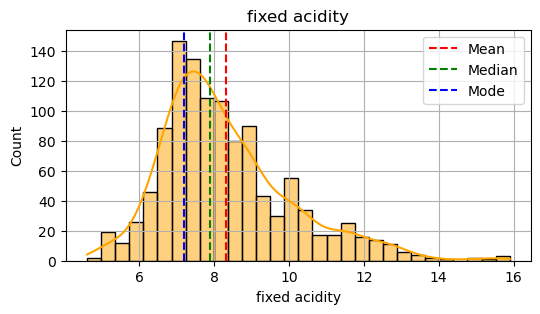

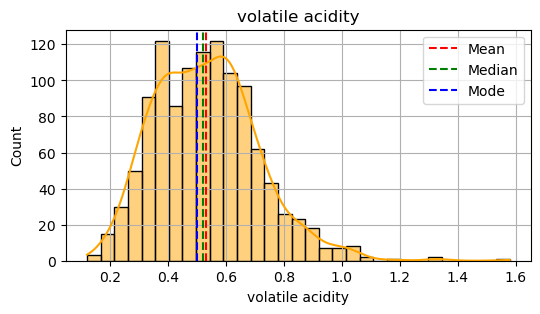

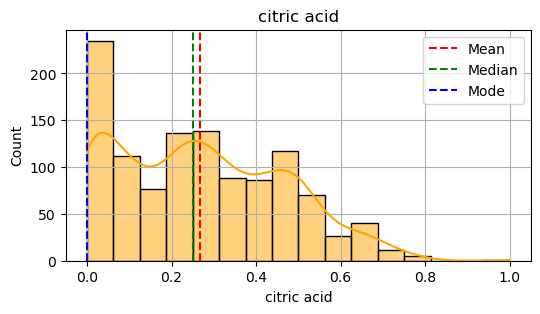

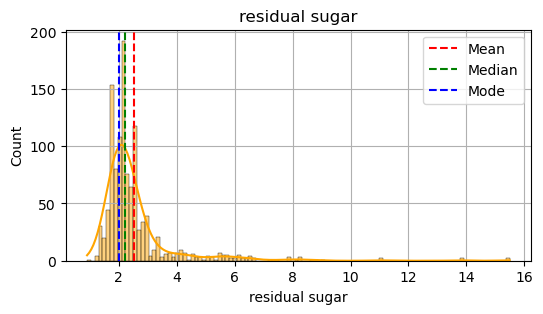

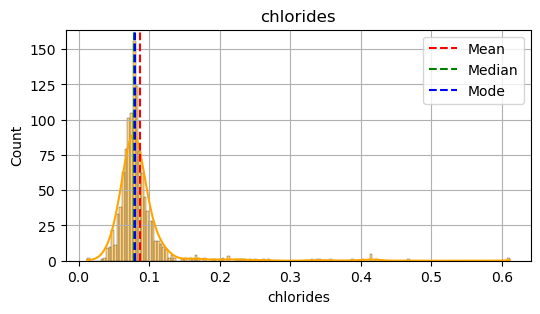

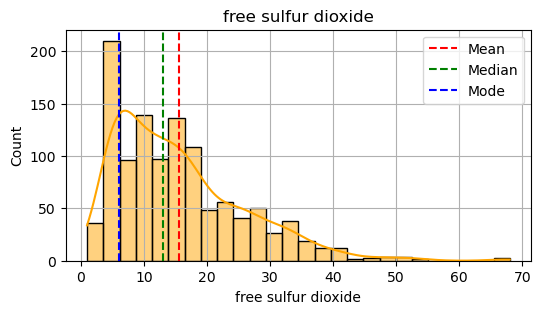

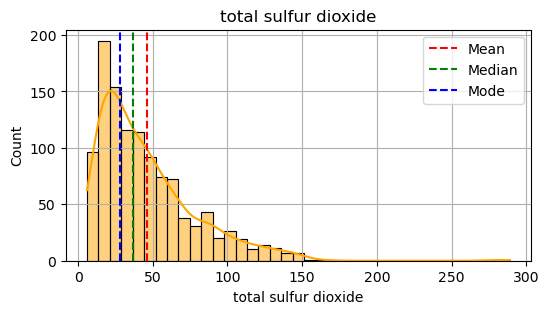

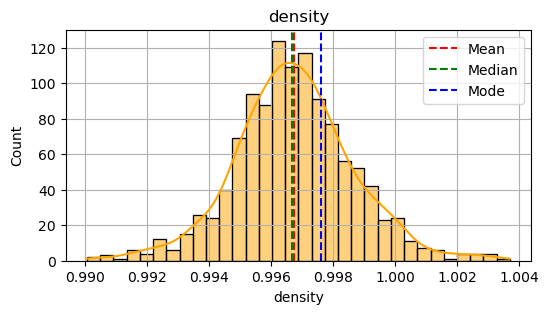

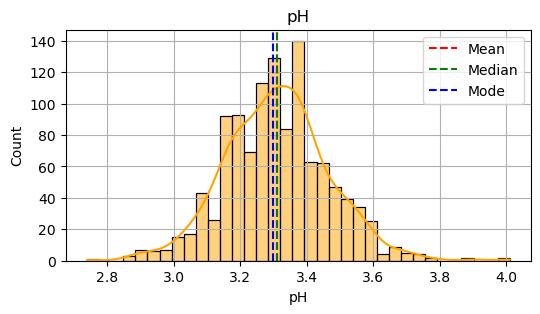

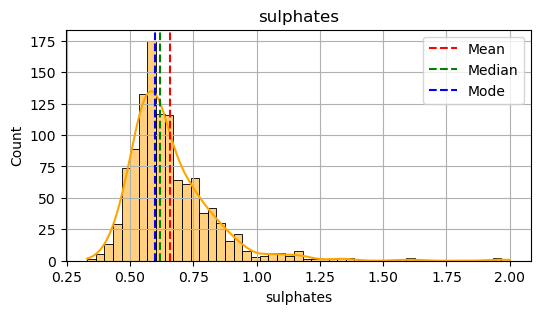

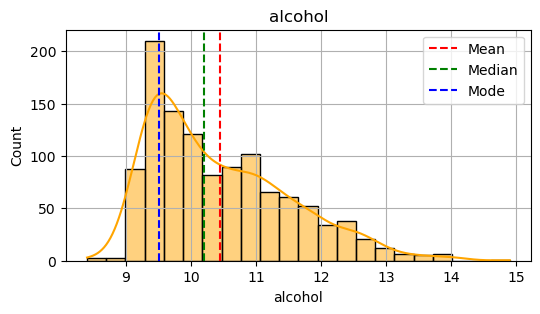

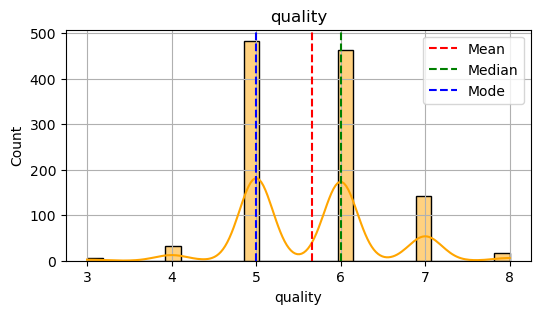

In [10]:
# analisi della distribuzione dei dati di ogni caratteristica
# tramite istogrammi

for col in df.columns:
    f, (ax1) = plt.subplots(1, 1, figsize=(6, 3))
    valori_distribuzione = df[col]
    sns.histplot(valori_distribuzione, ax=ax1, color='orange', kde=True)

    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode()[0]

    ax1.axvline(media, color='red', linestyle='--', label='Mean')
    ax1.axvline(mediana, color='green', linestyle='--', label='Median')
    ax1.axvline(moda, color='blue', linestyle='--', label='Mode')
    ax1.legend()
    ax1.set_title(col)
    plt.grid()
    plt.title(col)

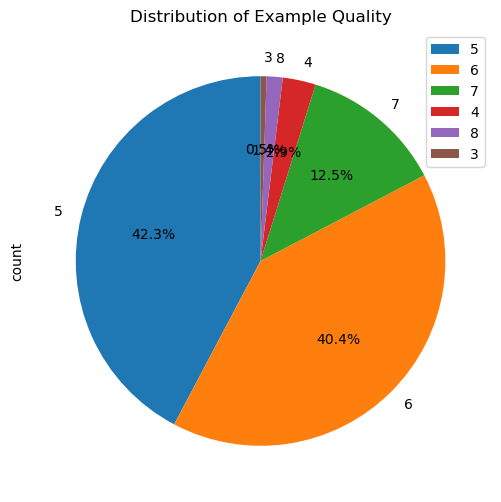

In [11]:
# analisi della distribuzione degli esempi disponibili
# relativamente alla qualità di ognuno tramite un
# diagramma a torta

plt.figure(figsize=(6, 6))
df['quality'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Example Quality')
plt.legend()
plt.show()

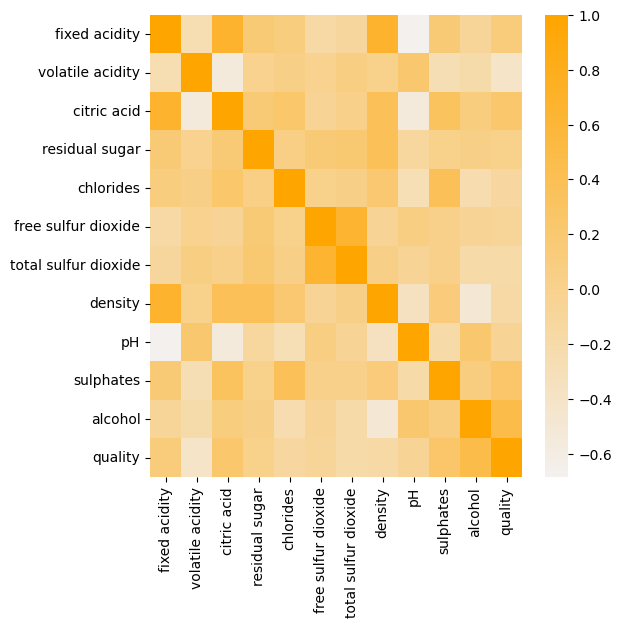

In [14]:
# analisi delle eventuali correlazioni
# tramite una mappa di correlazione

plt.figure(figsize=(6, 6))
corr = df.corr()
sns.heatmap(corr, xticklabels=True, yticklabels=True, cmap=color_map)

plt.show()

## creazione del dataset

In [15]:
# creare il dataset [x] con tutte le colonne
# del dataframe [df] eccetto la colonna [quality]
x = df.drop(columns=['quality']).copy().to_numpy()

# creare il dataset [y] usando la colonna
# [quality] del dataframe [df]
y = df['quality'].copy().to_numpy()

print('x', type(x), x.shape)
print('y', type(y), y.shape)

x <class 'numpy.ndarray'> (1143, 11)
y <class 'numpy.ndarray'> (1143,)


In [16]:
# si può riprovare a lanciare il notebook mischiando
# il dataset prima di addestrare il modello

x, y = shuffle(x, y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=143, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
x_train

(1000, 11)
(143, 11)
(143,)
(1000,)


array([[ 6.6  ,  0.695,  0.   , ...,  3.49 ,  0.67 ,  9.2  ],
       [ 8.5  ,  0.655,  0.49 , ...,  3.31 ,  1.14 ,  9.3  ],
       [ 9.9  ,  0.63 ,  0.24 , ...,  3.09 ,  0.57 ,  9.4  ],
       ...,
       [11.1  ,  0.35 ,  0.48 , ...,  3.17 ,  0.53 , 10.5  ],
       [ 7.1  ,  0.6  ,  0.   , ...,  3.47 ,  0.7  ,  9.9  ],
       [ 6.2  ,  0.52 ,  0.08 , ...,  3.56 ,  0.63 , 11.6  ]])

In [18]:
# normalizzare il dataset tra 0 e 1
# calcolando i valori su cui normalizzare
# sul solo dataset di addestramento
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)
x_train_norm

array([[0.17699115, 0.39383562, 0.        , ..., 0.59055118, 0.20359281,
        0.12307692],
       [0.34513274, 0.36643836, 0.49      , ..., 0.4488189 , 0.48502994,
        0.13846154],
       [0.46902655, 0.34931507, 0.24      , ..., 0.27559055, 0.14371257,
        0.15384615],
       ...,
       [0.57522124, 0.15753425, 0.48      , ..., 0.33858268, 0.11976048,
        0.32307692],
       [0.22123894, 0.32876712, 0.        , ..., 0.57480315, 0.22155689,
        0.23076923],
       [0.14159292, 0.2739726 , 0.08      , ..., 0.64566929, 0.17964072,
        0.49230769]])

## definizione del modello predittivo

In [19]:
# implementare una rete neurale artificiale
# con tre layer nascosti, ognuno con 8 neuroni
# e utilizzare la funzione di attivazione ReLu
# per ognuno di questi
input_layer = tf.keras.Input(shape=(11,))

layer_1 = tf.keras.layers.Dense(units=8, activation='relu')(input_layer)
layer_2 = tf.keras.layers.Dense(units=8, activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(units=8, activation='relu')(layer_2)

output_layer = tf.keras.layers.Dense(1)(layer_3)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mean_squared_error,
    metrics=tf.keras.metrics.mean_absolute_error
)

# visualizzare il sommario del modello
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249 (996.00 Byte)
Trainable params: 249 (996.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# addestrare il modello su 100 epoche
# sfruttando il dataset [x_test, y_test]
# per validare il modello ad ogni
# epoca

log = model.fit(x_train_norm, y_train,
    epochs=100,
    verbose=2,
    batch_size=64,
    validation_data=(x_test_norm,y_test)
)

Epoch 1/100


16/16 - 2s - loss: 9.7653 - mean_absolute_error: 2.3483 - val_loss: 0.6640 - val_mean_absolute_error: 0.6412 - 2s/epoch - 102ms/step
Epoch 2/100
16/16 - 0s - loss: 0.5752 - mean_absolute_error: 0.5952 - val_loss: 0.6531 - val_mean_absolute_error: 0.6377 - 68ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.5584 - mean_absolute_error: 0.5825 - val_loss: 0.6732 - val_mean_absolute_error: 0.6513 - 76ms/epoch - 5ms/step
Epoch 4/100
16/16 - 0s - loss: 0.5601 - mean_absolute_error: 0.5816 - val_loss: 0.6123 - val_mean_absolute_error: 0.6086 - 71ms/epoch - 4ms/step
Epoch 5/100
16/16 - 0s - loss: 0.5292 - mean_absolute_error: 0.5681 - val_loss: 0.6114 - val_mean_absolute_error: 0.6052 - 81ms/epoch - 5ms/step
Epoch 6/100
16/16 - 0s - loss: 0.5287 - mean_absolute_error: 0.5665 - val_loss: 0.5905 - val_mean_absolute_error: 0.5995 - 96ms/epoch - 6ms/step
Epoch 7/100
16/16 - 0s - loss: 0.5216 - mean_absolute_error: 0.5602 - val_loss: 0.5841 - val_mean_absolute_error: 0.5958 - 113ms

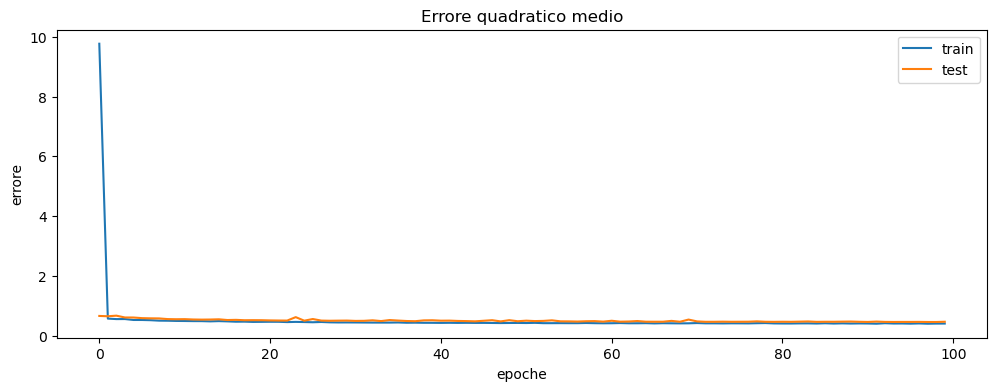

In [21]:
# visualizzazione dell'andamento dell'errore
# durante l'addestramento

plt.figure(figsize=(12, 4))
plt.title('Errore quadratico medio')
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='test')
plt.xlabel('epoche')
plt.ylabel('errore')
plt.legend()
plt.show()

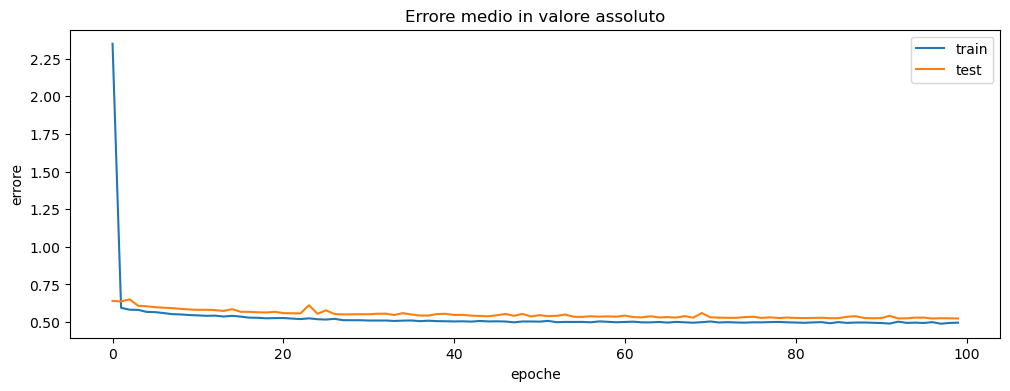

In [22]:
plt.figure(figsize=(12, 4))
plt.title('Errore medio in valore assoluto')
plt.plot(log.history['mean_absolute_error'], label='train')
plt.plot(log.history['val_mean_absolute_error'], label='test')
plt.xlabel('epoche')
plt.ylabel('errore')
plt.legend()
plt.show()

In [23]:
# recupero dati di validazione del modello
# ovvero l'errore quadratico medio e l'errore
# medio in valore assoluto del modello sul
# dataset di test
eval = model.evaluate(x_test_norm, y_test)
print(eval)

5/5 [==============================] - 0s 3ms/step - loss: 0.4699 - mean_absolute_error: 0.5245
[0.4699207544326782, 0.5244572758674622]


In [24]:
# effettuare predizioni sul dataset
# di validazione
preds = model.predict(x_test_norm)
print(type(preds))
print(preds.shape)
#print(preds)

5/5 [==============================] - 0s 2ms/step
<class 'numpy.ndarray'>
(143, 1)


In [25]:
# stampa del confronto tra valori reali e predetti
# su 10 esempi a caso del dataset di test
# utilizzare il valore dell'errore medio riscontrato
# in validazione del modello come offset rispetto
# al valore predetto per definire l'intervallo
# relativo alla "risposta del modello"
for _ in range(10):
    id = np.random.randint(0, len(x_test_norm))
    print('predetto:', int(preds[id][0] - eval[1]), '-', int(preds[id][0] + eval[1]), '\treale:', y_test[id])

predetto: 5 - 6 	reale: 7
predetto: 5 - 6 	reale: 6
predetto: 4 - 6 	reale: 6
predetto: 5 - 6 	reale: 7
predetto: 5 - 6 	reale: 6
predetto: 4 - 5 	reale: 5
predetto: 5 - 6 	reale: 6
predetto: 4 - 5 	reale: 6
predetto: 4 - 5 	reale: 6
predetto: 4 - 5 	reale: 6
